In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


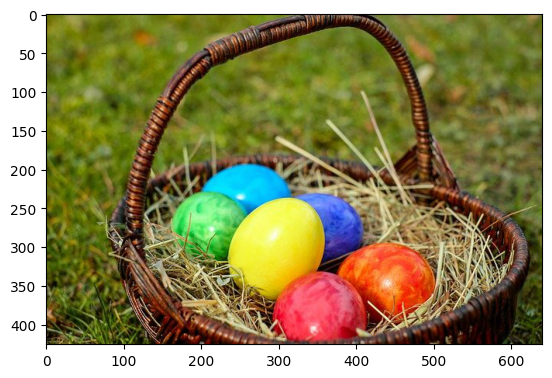

In [2]:
import numpy as np
from PIL import Image # 이미지처리하기 편한 라이브러리
import matplotlib.pyplot as plt

color_img = Image.open('/content/drive/MyDrive/한국SW산업협회 교육-Java 과정/파이썬 실습/fruits.jpg')

plt.imshow(color_img)
plt.show()

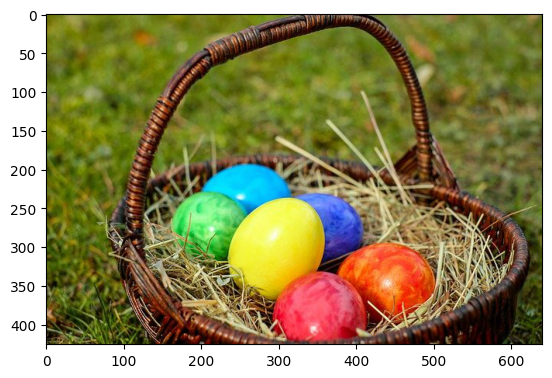

shape : (426, 640, 3)


In [3]:
# 우리가 필요한 건 ndarray다.
# numpy를 이용해서 데이터를 뽑아내자.

color_pixel = np.array(color_img)

# pixel 데이터를 이용해도 그림을 그리는 게 가능하다.
plt.imshow(color_pixel)
plt.show()
print('shape : {}'.format(color_pixel.shape))
  # 출력
  #   shape : (426, 640, 3)
  #   (세로 픽셀 수, 가로 픽셀 수, 차원 수)

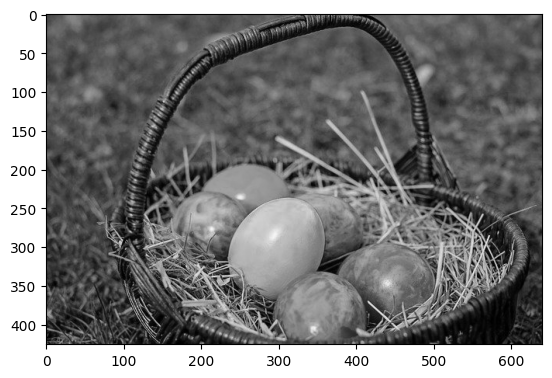

(426, 640, 3)


In [4]:
# 컬러 이미지를 흑백 이미지(3차원)로 변경
# 각 pixel의 RGB값을 평균내서 RGB칸에 설정하면 흑백처리된다.

gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
  for x in range(gray_pixel.shape[1]):
    gray_pixel[y, x] = np.mean(gray_pixel[y,x])
      # gray_pixel[y,x] 데이터가 r, g, b 세 개의 데이터이므로 평균을 얻을 수 있다.

plt.imshow(gray_pixel)
plt.show()
print(gray_pixel.shape)
  # 출력
  #   (426, 640, 3)

(426, 640)


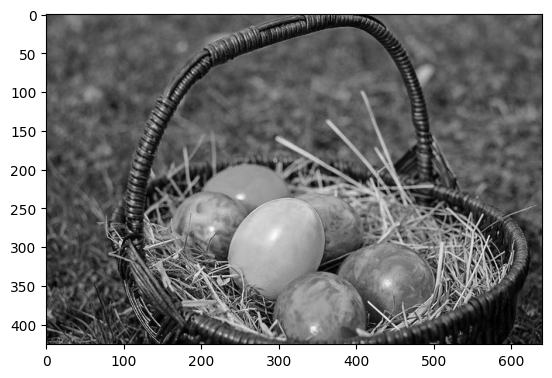

In [5]:
# 흑백 3차원 이미지를 2차원으로 변경
# 3차원이 아니라 2차원 흑백 이미지로 만들어보자.
# 사이즈를 더 줄일 수 있음.

# 이미지 데이터 2차원으로 변경
gray_2d_pixel = gray_pixel[:,:,0]
print(gray_2d_pixel.shape)

# 이미지 출력
plt.imshow(gray_2d_pixel, cmap='gray')
plt.show()

In [ ]:
# CNN 실습

In [6]:
# module 불러오기

import numpy as np # numpy 기능
import tensorflow as tf # tensorflow 기능
import matplotlib.pyplot as plt # 그림그리기
import matplotlib.image as img # image 불러오기 위함

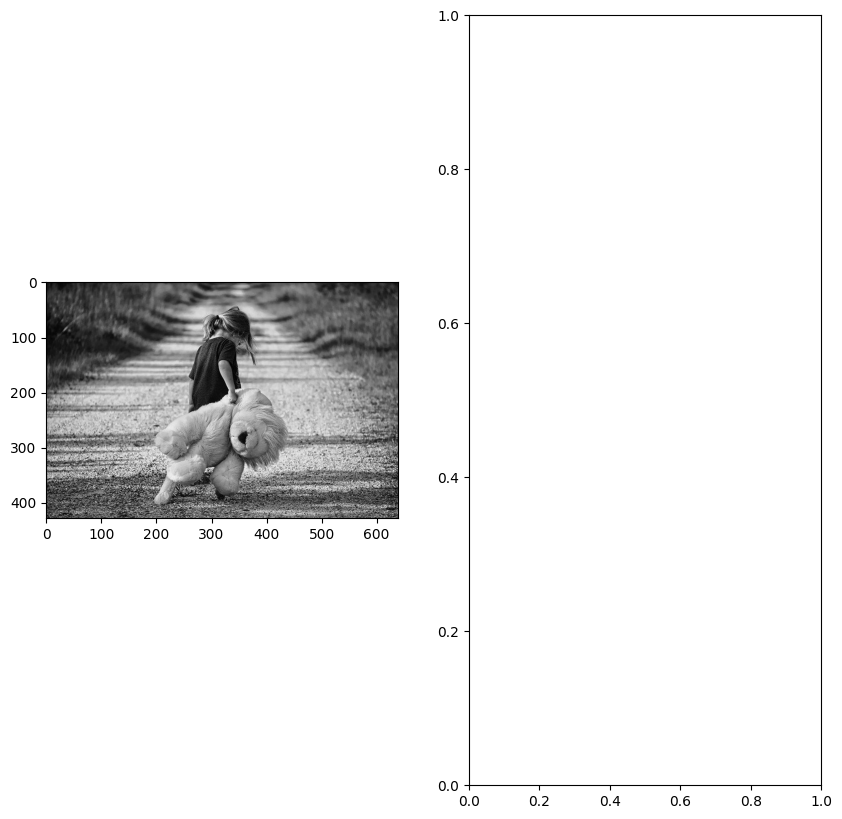

In [7]:
# 그림 그리기

# 도화지 준비
fig = plt.figure(figsize=(10,10)) # 가로세로 크기는 inch단위

# 도화지를 위 아래 두 부분으로 나누기
ax1 = fig.add_subplot(1,2,1) # 행 1, 열 2, 순서 1번째
ax2 = fig.add_subplot(1,2,2) # 행 1, 열 2, 순서 2번째

# 이미지 불러오기
ori_image = img.imread('/content/drive/MyDrive/한국SW산업협회 교육-Java 과정/파이썬 실습/girl-teddy.jpg')
ax1.imshow(ori_image)

In [8]:
# 이미지 준비

print(ori_image.shape)
  # 출력
  # (429, 640, 3)
  # 가로pixel, 세로pixel, 채널수

# 입력이미지의 형태
# Conv 연산 함수는 4차원 데이터를 요구한다.
# 따라서 3차원이었던 데이터를 4차원으로 변경해야 한다.
# (1, 429, 640, 3) => (이미지 개수, height, width, color)
input_image = ori_image.reshape((1,) + ori_image.shape)
input_image = input_image.astype(np.float32)
print('Convolution input image.shape : {}'.format(input_image.shape))

# 입력이미지 channel 변경
# (1, 429, 640, 1) => (이미지 개수, height, width, color)
# slicing을 이용하여 첫번째 R(Red) 값만 이용
channel_1_input_image = input_image[:,:,:,0:1] # numpy의 slicing 활용
print('Channel 변경 input_image.shape : {}'.format(channel_1_input_image.shape))

(429, 640, 3)
Convolution input image.shape : (1, 429, 640, 3)
Channel 변경 input_image.shape : (1, 429, 640, 1)


In [9]:
# filter 준비

# filter
# (3,3,1,1) => (filter height, filter width, filter channel, filter 개수)
# filter의 채널은 원본 이미지의 채널과 항상 동일해야 한다.
#   따라서 세 번째 값이 1이 되도록 만든다.
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
# -1 값은 크게 의미 없음.
print('적용할 filter shape : {}'.format(weight.shape))


적용할 filter shape : (3, 3, 1, 1)


In [10]:
# Convolution(합성곱) 결과

conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID').numpy()
print('Convolution 결과 shape : {}'.format(conv2d.shape))
  # 출력
  #   Convolution 결과 shape : (1, 427, 638, 1)
  #   원본에 비해 2픽셀씩 줄어들었다.

Convolution 결과 shape : (1, 427, 638, 1)


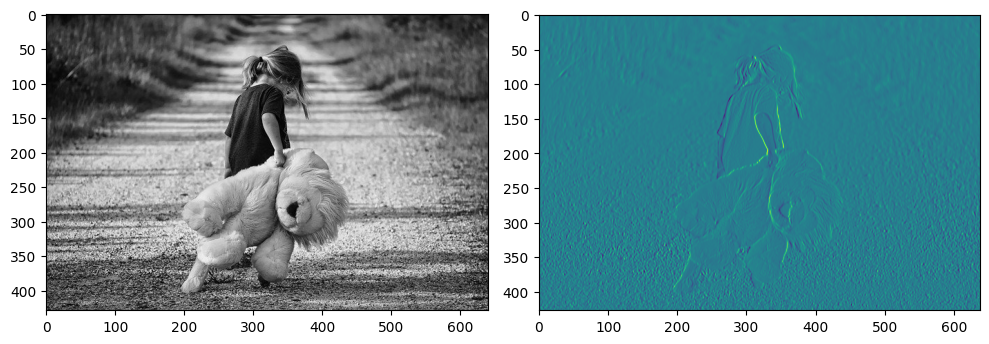

In [12]:
# 출력하기

# 도화지 준비
fig = plt.figure(figsize=(10,10)) # 가로세로 크기는 inch단위

# 도화지를 위 아래 두 부분으로 나누기
ax1 = fig.add_subplot(1,2,1) # 행 1, 열 2, 순서 1번째
ax2 = fig.add_subplot(1,2,2) # 행 1, 열 2, 순서 2번째

# 이미지 불러오기
ori_image = img.imread('/content/drive/MyDrive/한국SW산업협회 교육-Java 과정/파이썬 실습/girl-teddy.jpg')

t_img = conv2d[0,:,:,:]

ax1.imshow(ori_image)
ax2.imshow(t_img)
fig.tight_layout()
plt.show()

In [ ]:
# MAX Pooling 실습

Convolution input image.shape : (1, 429, 640, 3)
Channel 변경 input_image.shape : (1, 429, 640, 1)
적용할 filter shape : (3, 3, 1, 1)


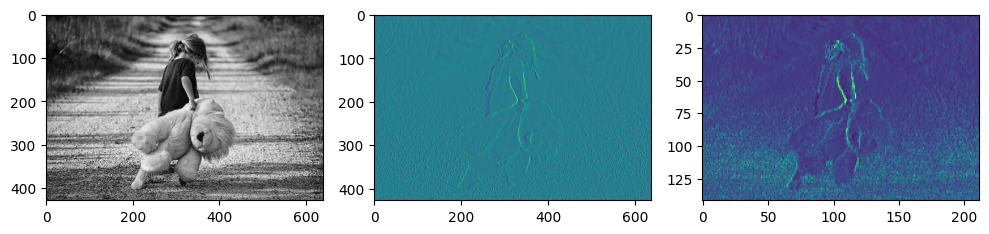

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure(figsize=(10,10))  # 가로세로 크기 inch단위

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ori_image = img.imread('/content/drive/MyDrive/한국SW산업협회 교육-Java 과정/파이썬 실습/girl-teddy.jpg')

# 첫 번째 그림판에는 이미지 원본 출력
ax1.imshow(ori_image)

# 입력이미지의 형태
# (1, 429, 640, 3) => (이미지 개수, height, width, color)
input_image = ori_image.reshape((1,) + ori_image.shape)
input_image = input_image.astype(np.float32)
print('Convolution input image.shape : {}'.format(input_image.shape))

# 입력이미지 channel 변경
# (1, 429, 640, 1) => (이미지 개수, height, width, color)
# slicing을 이용하여 첫번째 R(Red) 값만 이용
channel_1_input_image = input_image[:,:,:,0:1]
print('Channel 변경 input_image.shape : {}'.format(channel_1_input_image.shape))



# filter
# (3,3,1,1) => (filter height, filter width, filter channel, filter 개수)
# weight = np.random.rand(3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print('적용할 filter shape : {}'.format(weight.shape))

# stride : 1 (가로1, 세로1)
# padding = 'VALID'

conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID').numpy()
t_img = conv2d[0,:,:,:]
# 2번째 그림판에 convolution한 이미지(특징을 뽑아낸) 출력
ax2.imshow(t_img)



## pooling 처리 ##
# ksize = pooling filter의 크기
pool = tf.nn.max_pool(conv2d, 
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1], 
                      padding='VALID').numpy()
t_img = pool[0,:,:,:]
# 3번째 그림판에 pooling한 이미지(크기를 줄인) 출력
ax3.imshow(t_img)


fig.tight_layout()
plt.show()

# 여기서 나온 conv2d, pool 설정 코드들은 실제로는 사용되지 않는다.
# 설명을 위해서 명시해본 것.

In [ ]:
# MNIST를 CNN으로 구현해보자.

# 여러 가지 방식으로 구현해보고 정확도의 결과 비교
# 1. MNIST를 Multinomial Classification으로 구현(머신러닝 기본 기법) => 정확도 보기
# 2. MNIST를 DNN으로 구현(딥러닝 기본 기법) => 정확도 얻기
# 3. MNIST를 CNN으로 구현(응용 기법) => 정확도 얻기

In [28]:
### 공통 코드 - 데이터 만들기

# module 불러오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # train 데이터와 test 데이터를 분리하기 위함
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping # 작업 도중 조기 종료시키기

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/한국SW산업협회 교육-Java 과정/파이썬 실습/mnist-train.csv')
display(df.head(), df.shape)
  # 출력
  #   data frame 5 rows × 785 columns
  #   (42000, 785)
# 우리 데이터는 샘플로 제공된 거라서 결측치, 이상치가 없다.
# 실제로 할 때는 결측치, 이상치 처리를 반드시 해야 한다.

# 데이터 나누기
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3)

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

In [31]:
### 첫 번째 Model : Multinomial Classification(머신러닝)

model_1 = Sequential()

model_1.add(Flatten(input_shape=(784,)))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) # 정확도를 근간으로 우리 모델을 평가

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, # loss값이 떨어지지 않는 경우 몇 번이나 참을지 설정
                               verbose=1, # 중간 결과값 화면에 출력
                               mode='auto', # 정해져있는 값이니 그냥 auto
                               restore_best_weights=True) # 최적의 값을 얻었을 때 그 값 저장해두기

model_1.fit(x_data_train_norm,
            t_data_train,
            epochs=2000,
            validation_split=0.2,
            verbose=1,
            batch_size=100,
            callbacks=[early_stopping]) # early_stopping값 적용시키기

# 출력
  # Epoch 153/2000
  # 217/236 [==========================>...] - ETA: 0s - loss: 0.2379 - accuracy: 0.9323Restoring model weights from the end of the best epoch: 150.
  # 236/236 [==============================] - 1s 3ms/step - loss: 0.2351 - accuracy: 0.9334 - val_loss: 0.2908 - val_accuracy: 0.9189
  # Epoch 153: early stopping
  # <keras.callbacks.History at 0x7f51fa9201f0>

Epoch 1/2000
236/236 [==============================] - 3s 4ms/step - loss: 1.9815 - accuracy: 0.3561 - val_loss: 1.6532 - val_accuracy: 0.6366
Epoch 2/2000
236/236 [==============================] - 1s 3ms/step - loss: 1.4077 - accuracy: 0.7384 - val_loss: 1.2359 - val_accuracy: 0.7765
Epoch 3/2000
236/236 [==============================] - 1s 4ms/step - loss: 1.0865 - accuracy: 0.8084 - val_loss: 0.9976 - val_accuracy: 0.8153
Epoch 4/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.8981 - accuracy: 0.8312 - val_loss: 0.8514 - val_accuracy: 0.8308
Epoch 5/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.7775 - accuracy: 0.8447 - val_loss: 0.7538 - val_accuracy: 0.8413
Epoch 6/2000
236/236 [==============================] - 1s 4ms/step - loss: 0.6943 - accuracy: 0.8540 - val_loss: 0.6834 - val_accuracy: 0.8488
Epoch 7/2000
236/236 [==============================] - 1s 3ms/step - loss: 0.6334 - accuracy: 0.8610 - val_loss: 0.6306 - val_accuracy:

In [32]:
### 첫 번째 Model => Multinomial Classification(머신러닝)
# 평가

print(model_1.evaluate(x_data_test_norm, t_data_test))
# 출력
  # 394/394 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.9222
  # [0.28126806020736694, 0.9222221970558167]

394/394 [==============================] - 1s 2ms/step - loss: 0.2813 - accuracy: 0.9222
[0.28126806020736694, 0.9222221970558167]


In [33]:
### 두 번째 Model : DNN(딥러닝)

model_2 = Sequential()

# input layer
model_2.add(Flatten(input_shape=(784,)))

# hidden layer 추가
# node의 개수는 아무거나 적음. 물론, 더 효과적인 개수에 대해 정리된 것도 있음.
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(32, activation='relu'))

# output layer
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) # 정확도를 근간으로 우리 모델을 평가

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, # loss값이 떨어지지 않는 경우 몇 번이나 참을지 설정
                               verbose=1, # 중간 결과값 화면에 출력
                               mode='auto', # 정해져있는 값이니 그냥 auto
                               restore_best_weights=True) # 최적의 값을 얻었을 때 그 값 저장해두기

model_2.fit(x_data_train_norm,
            t_data_train,
            epochs=2000,
            validation_split=0.2,
            verbose=1,
            batch_size=100,
            callbacks=[early_stopping]) # early_stopping값 적용시키기

# 출력
  # Epoch 49/2000
  # 231/236 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9884Restoring model weights from the end of the best epoch: 46.
  # 236/236 [==============================] - 1s 4ms/step - loss: 0.0464 - accuracy: 0.9884 - val_loss: 0.1412 - val_accuracy: 0.9597
  # Epoch 49: early stopping
  # <keras.callbacks.History at 0x7f5244a2c4f0>

Epoch 1/2000
236/236 [==============================] - 3s 5ms/step - loss: 1.6400 - accuracy: 0.5154 - val_loss: 0.8913 - val_accuracy: 0.7864
Epoch 2/2000
236/236 [==============================] - 1s 4ms/step - loss: 0.6279 - accuracy: 0.8407 - val_loss: 0.4975 - val_accuracy: 0.8684
Epoch 3/2000
236/236 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.8864 - val_loss: 0.3870 - val_accuracy: 0.8952
Epoch 4/2000
236/236 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.9056 - val_loss: 0.3363 - val_accuracy: 0.9053
Epoch 5/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.2981 - accuracy: 0.9162 - val_loss: 0.3040 - val_accuracy: 0.9129
Epoch 6/2000
236/236 [==============================] - 1s 6ms/step - loss: 0.2711 - accuracy: 0.9231 - val_loss: 0.2831 - val_accuracy: 0.9197
Epoch 7/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.2502 - accuracy: 0.9279 - val_loss: 0.2683 - val_accuracy:

In [34]:
### 두 번째 Model : DNN(딥러닝)
# 평가

print(model_2.evaluate(x_data_test_norm, t_data_test))
# 출력
  # 394/394 [==============================] - 1s 2ms/step - loss: 0.1410 - accuracy: 0.9592
  # [0.14098674058914185, 0.9592063426971436]

# 결과 비교
# 첫 번째 : 0.922
# 두 번째 : 0.959

394/394 [==============================] - 1s 2ms/step - loss: 0.1410 - accuracy: 0.9592
[0.14098674058914185, 0.9592063426971436]


In [37]:
### 세 번째 Model : CNN(딥러닝)

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
  # Conv2D : conv 계산 후 relu 돌리는 레이어
  # MaxPooling2D : Max Pooling
  # Dropout : 과적합을 피할 수 있게 해주는 것

model_3 = Sequential()

## Feature Extraction(Convolution 처리)
# convolution
model_3.add(Conv2D(filters=32,
                   kernel_size=(3, 3),
                   activation='relu',
                   input_shape=(28, 28, 1)))
  # filters=32 : filter의 개수
  #   이를 통해, 원본 데이터 1개 당 32개의 변형 데이터를 얻을 수 있다.
  # kernel_size=(3,3) : filter(kernel)의 행렬 크기
  # input_shape=(28, 28, 1)
  #   첫 번째 input은 ㅁ 와 ㅁㅁㅁㅁ 가 합쳐진다.
  #   이미지 한 개의 shape을 적으면 된다.
  #   28 x 28 사이즈, 채널은 1개짜리

# pooling
model_3.add(MaxPooling2D(pool_size=(2, 2)))
  # pool_size=(2, 2) : pooling하는 필터 크기

# 위 내용(conv, pooling)을 원하는 대로 반복
# convolution
model_3.add(Conv2D(filters=64,
                   kernel_size=(3, 3),
                   activation='relu'))

# pooling
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# convolution
model_3.add(Conv2D(filters=64,
                   kernel_size=(3, 3),
                   activation='relu'))

# input layer
# 이번에는 input_shape을 고정적으로 잡지 않는다.
#   앞단계 설정에 따라 몇 개의 input이 들어올 지 알 수 없기 때문
model_3.add(Flatten())

# hidden layer 추가
# node의 개수는 아무거나 적음. 물론, 더 효과적인 개수에 대해 정리된 것도 있음.
model_3.add(Dense(128, activation='relu'))

# output layer
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) # 정확도를 근간으로 우리 모델을 평가

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, # loss값이 떨어지지 않는 경우 몇 번이나 참을지 설정
                               verbose=1, # 중간 결과값 화면에 출력
                               mode='auto', # 정해져있는 값이니 그냥 auto
                               restore_best_weights=True) # 최적의 값을 얻었을 때 그 값 저장해두기



# CNN에는 여러 장의 이미지가 들어가기 때문에, 반드시 4차원 데이터를 넣어줘야 한다.
# 따라서 기존에 2차원이었던 데이터 x_data_train_norm 를 4차원으로 바꿔서 사용해야 한다.
model_3.fit(x_data_train_norm.reshape(-1, 28, 28, 1),
            t_data_train,
            epochs=2000,
            validation_split=0.2,
            verbose=1,
            batch_size=100,
            callbacks=[early_stopping]) # early_stopping값 적용시키기

# 출력
  # Epoch 27/2000
  # 236/236 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9905Restoring model weights from the end of the best epoch: 24.
  # 236/236 [==============================] - 1s 6ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0551 - val_accuracy: 0.9827
  # Epoch 27: early stopping
  # <keras.callbacks.History at 0x7f5244b457c0>

Epoch 1/2000
236/236 [==============================] - 5s 8ms/step - loss: 1.1535 - accuracy: 0.6901 - val_loss: 0.4340 - val_accuracy: 0.8724
Epoch 2/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.3183 - accuracy: 0.9060 - val_loss: 0.2765 - val_accuracy: 0.9170
Epoch 3/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.2178 - accuracy: 0.9341 - val_loss: 0.2063 - val_accuracy: 0.9401
Epoch 4/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.1683 - accuracy: 0.9499 - val_loss: 0.1688 - val_accuracy: 0.9500
Epoch 5/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.1369 - accuracy: 0.9596 - val_loss: 0.1409 - val_accuracy: 0.9595
Epoch 6/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.1186 - accuracy: 0.9645 - val_loss: 0.1243 - val_accuracy: 0.9641
Epoch 7/2000
236/236 [==============================] - 2s 7ms/step - loss: 0.1045 - accuracy: 0.9670 - val_loss: 0.1126 - val_accuracy:

In [39]:
### 세 번째 Model : CNN(딥러닝)
# 평가

print(model_3.evaluate(x_data_test_norm.reshape(-1, 28, 28, 1),
                       t_data_test))
# 출력
  # 394/394 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9836
  # [0.05337640270590782, 0.9835714101791382]

# 결과 비교
# 첫 번째 : 0.922
# 두 번째 : 0.959
# 세 번째 : 0.984

394/394 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9836
[0.05337640270590782, 0.9835714101791382]
